# Regression Model 

In [7]:
import numpy as np
import re
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import pandas as pd

## Data Cleaning

In [8]:
data= pd.read_csv("../raw_data/restaurants.csv", header= None)
data=data.rename(columns={0:"Index", 1:"name", 2:"rating", 3:"review_count", 4:"price", 5:"address", 6:"label"})
data=data.drop(columns='Index') # Check whether to keep it or not 

In [9]:
data

,name,rating,review_count,price,address,label
0,Darshan Nepal,"4,4",375 comentários no Google,€€,"Av. Alm. Reis 48A, 1150-019 Lisboa","['Comer no local', 'Com recolha móvel', 'Entre..."
1,Chillis Bangladesh Indian Restaurant Curry House,"4,1",33 comentários no Google,€€,"R. do Benformoso 256, 1100-088 Lisboa","['Comer no local', 'Take away']"
2,Dreams Sushi Restaurant & Take Away,"4,1",33 comentários no Google,€€,"Rua do Zaire 27, 1170-172 Lisboa","['Comer no local', 'Take away', 'Entrega']"
3,Restaurante Santos (Comida de Nepalesa & Portu...,"5,0",25 comentários no Google,€€,"Rua do Forno do Tijolo 60, 1170-138 Lisboa","['Comer no local', 'Take away']"
4,Papa Chidera Nigeria Restaurant,"4,6",20 comentários no Google,€€,1170-287 Lisboa,"['Comer no local', 'Take away']"
5,Leo Restaurant,"4,6",443 comentários no Google,€,"Rua do Zaire 17C, 1170-397 Lisboa","['Comer no local', 'Take away', 'Entrega sem c..."
6,Kerala,"4,8",459 comentários no Google,€€,"R. Passos Manuel 14, 1150-260 Lisboa","['Comer no local', 'Take away', 'Entrega']"
7,Trinca,"4,8",195 comentários no Google,€€,"Rua dos Anjos 59C, 1150-034 Lisboa","['Comer no local', 'Com recolha móvel', 'Entre..."
8,Tulsi Restaurant,"4,7",151 comentários no Google,€€,"R. do Benformoso 262, 1100-087 Lisboa","['Comer no local', 'Take away', 'Não faz entre..."
9,O Gambuzino,"4,7",408 comentários no Google,€€,"Rua dos Anjos 5A, 1150-032 Lisboa","['Comer no local', 'Com recolha móvel', 'Entre..."


In [10]:
def keep_numeric(x):
    return re.sub("[^0-9]", "", x)

In [11]:
def replace_price(x):
    if x == "€":
        return 1
    if x == "€€": 
        return 2 
    if x == "€€€": 
        return 3 
    if x == "€€€€": 
        return 4 

In [12]:
def transform_lat(x):
    try:
        geolocator = Nominatim(user_agent="aaaa")
        location = geolocator.geocode(x)
        return (location.latitude)
    except: AttributeError
    pass

def transform_lon(x):
    try:
        geolocator = Nominatim(user_agent="aaaa")
        location = geolocator.geocode(x)
        return (location.longitude)
    except: AttributeError
    pass

In [13]:
# Column rating 
data.rating=data.rating.replace(',', '.', regex=True)
data.rating=pd.to_numeric(data.rating, downcast="float")

# Column review_count 
data.review_count=data.review_count.map(keep_numeric)
data.review_count=pd.to_numeric(data.review_count, downcast="float")

#Column price 
data.price = data.price.map(replace_price)

#Adress into latitude and longitude 
data['latitude']=data.address.map(transform_lat)
data['longitude']=data.address.map(transform_lon) # have to do something for all the na 

data.label= data['label'].str.lower()

(array([ 1.,  2.,  1.,  3.,  5.,  4., 11.,  7.,  5.,  1.]),
 array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

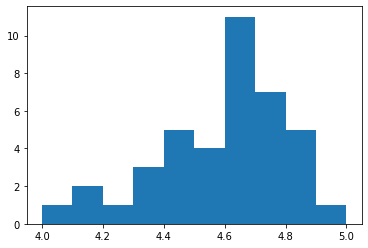

In [14]:
# Repartition of reviews
plt.hist(data.rating)

average number of reviews per store: 598.675
Some outliers with many reviews: 


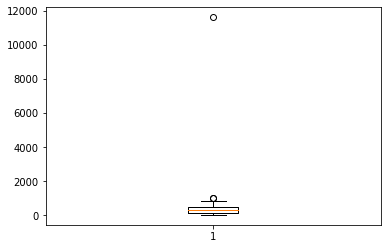

In [17]:
# number of reviews per store: 
plt.boxplot(data.review_count)

print('average number of reviews per store:', data.review_count.mean())
print('Some outliers with many reviews: ')

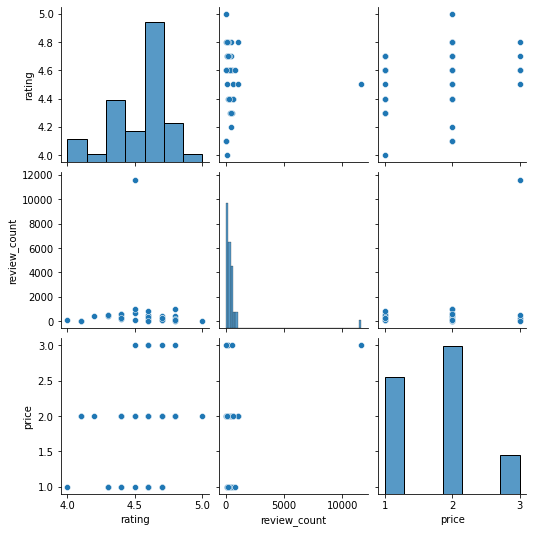

In [18]:
sns.pairplot(data[['rating', 'review_count', 'price']])

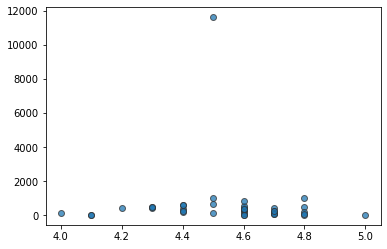

In [19]:
plt.scatter(data.rating, data.review_count,  edgecolor='#333333', alpha=0.75)

In [20]:
data.label.value_counts()


['comer no local', 'take away', 'entrega']                         13
['comer no local', 'take away']                                    10
['comer no local', 'take away', 'não faz entregas']                 4
['comer no local', 'com recolha móvel', 'entrega']                  3
['comer no local', 'não faz entregas']                              3
['comer no local', 'com recolha móvel', 'entrega sem contacto']     2
['comer no local', 'take away', 'entrega sem contacto']             2
['comer no local', 'drive-thru']                                    1
['comer no local', 'drive-thru', 'entrega sem contacto']            1
['comer no local', 'com recolha móvel']                             1
Name: label, dtype: int64

In [21]:
data.groupby('label').mean()
#regions = countries_df.groupby('Region')

,rating,review_count,price
label,,,
"['comer no local', 'com recolha móvel', 'entrega sem contacto']",4.550000,391.500000,2.000000
"['comer no local', 'com recolha móvel', 'entrega']",4.500000,140.000000,1.333333
"['comer no local', 'com recolha móvel']",4.600000,340.000000,2.000000
"['comer no local', 'drive-thru', 'entrega sem contacto']",4.500000,11611.000000,3.000000
"['comer no local', 'drive-thru']",4.700000,239.000000,1.000000
"['comer no local', 'não faz entregas']",4.500000,257.000000,1.333333
"['comer no local', 'take away', 'entrega sem contacto']",4.600000,414.500000,1.000000
"['comer no local', 'take away', 'entrega']",4.507692,330.307678,1.666667
"['comer no local', 'take away', 'não faz entregas']",4.675000,478.000000,2.500000


In [22]:
data


,name,rating,review_count,price,address,label,latitude,longitude
0,Darshan Nepal,4.4,375.0,2.0,"Av. Alm. Reis 48A, 1150-019 Lisboa","['comer no local', 'com recolha móvel', 'entre...",None,None
1,Chillis Bangladesh Indian Restaurant Curry House,4.1,33.0,2.0,"R. do Benformoso 256, 1100-088 Lisboa","['comer no local', 'take away']",None,None
2,Dreams Sushi Restaurant & Take Away,4.1,33.0,2.0,"Rua do Zaire 27, 1170-172 Lisboa","['comer no local', 'take away', 'entrega']",None,None
3,Restaurante Santos (Comida de Nepalesa & Portu...,5.0,25.0,2.0,"Rua do Forno do Tijolo 60, 1170-138 Lisboa","['comer no local', 'take away']",None,None
4,Papa Chidera Nigeria Restaurant,4.6,20.0,2.0,1170-287 Lisboa,"['comer no local', 'take away']",None,None
5,Leo Restaurant,4.6,443.0,1.0,"Rua do Zaire 17C, 1170-397 Lisboa","['comer no local', 'take away', 'entrega sem c...",None,None
6,Kerala,4.8,459.0,2.0,"R. Passos Manuel 14, 1150-260 Lisboa","['comer no local', 'take away', 'entrega']",None,None
7,Trinca,4.8,195.0,2.0,"Rua dos Anjos 59C, 1150-034 Lisboa","['comer no local', 'com recolha móvel', 'entre...",None,None
8,Tulsi Restaurant,4.7,151.0,2.0,"R. do Benformoso 262, 1100-087 Lisboa","['comer no local', 'take away', 'não faz entre...",None,None
9,O Gambuzino,4.7,408.0,2.0,"Rua dos Anjos 5A, 1150-032 Lisboa","['comer no local', 'com recolha móvel', 'entre...",None,None


## LinearRegression 

In [25]:
benchmark = data.rating.mean()

In [38]:
# set X and y 
X = data[['review_count', 'price']]
y =data['rating']

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_count  40 non-null     float32
 1   price         39 non-null     float64
dtypes: float32(1), float64(1)
memory usage: 608.0 bytes


In [39]:
model = LinearRegression()

cv_results = cross_validate(model, X_train, y_train, cv=5)

/Users/malou/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/malou/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/malou/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/malou/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/sklearn/base.py", line 700, in score
    y_pred = self.predict(X)
  File "/Users/malou/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 362, in predict
    return self._

In [40]:
model.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
prediction = model.predict()

### Preproc

In [ ]:
preproc_numerical_baseline = make_pipeline(
    StandardScaler())

preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, make_column_selector(dtype_include=["int64", "float64"])),
    (preproc_categorical_baseline, feat_categorical_small),
    remainder="drop")

preproc_baseline

In [ ]:
fit_transform(X)

In [ ]:
pipe_baseline = make_pipeline(preproc_baseline, model())

In [ ]:
score_baseline = cross_val_score(pipe_baseline, X, y, cv=5, scoring=mse).mean()

In [ ]:
pipe_baseline.fit(X,y)
y_pred_baseline = pipe_baseline.predict(X_test)

In [ ]:
GridSearch

## Gradient Booster Regressor 